##Precos de notebook

Trabalho A3 Inteligencia artifical<br>


Gabriel Antonio Lopes de Castro - 1272023100


Os dados sao de uma base de datos sobre o preco e outras informacoes sobre alguns modelos de notebooks.<br><br>
Possuindo informacoes sobre:<br><br>
brand; model; processor_brand; processor_name; processor_gnrtn; ram_gb; ram_type; ssd; hdd; os; os_bit; graphic_card_gb; weight; display_size; warranty; Touchscreen; msoffice; latest_price; old_price; discount; star_rating; ratings; reviews <br><br>
link:<br>
https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list?resource=download

##Problema e analise do problema

O objetivo e prever o valores finais do preco de notebooks com base em algumas caracteristicas e informacoes. A tarefa vai ser construir um modelo capaz de aprender com os dados fornecidos e a partiri disso prever esse valores recebendo alguns dados e a partir deles fazer essa predicao, para regular os valores e corrigir ou preecher caso algo seja perdido. Vai ser utilizado a regressao

Componentes rodam de forma assíncrona<br>
Quanto à Supervisão: Treinamento Supervisionado (dados rotulados)<br>
Quanto à Tarefa: Regressão multivariada (previsão de valor contínuo com múltiplas características)<br>
Quanto ao Modo: Aprendizado em Lote (não há fluxo contínuo de dados, não há necessidade de ajuste rápido a mudança de dados, dados são pequenos para memória)<br>
Medida de Desempenho*: Raiz do Erro Quadrático Médio (RMSE), erro absoluto médio (MAE)<br>

OBS: Os dados nao precisaram ser modificados manualmente para serem tradados depois, visto que ja continham problemas que precisariam ser tratados

##CONFIGURACAO E IMPORTACOES

Primeiro, vamos importar alguns módulos comuns, garantir que o MatplotLib plote as figuras inline e prepare uma função para salvar as figuras. Também verificamos se o Python 3.5 ou posterior está instalado (embora o Python 2.x possa funcionar, ele está obsoleto, portanto, recomendamos fortemente que você use o Python 3), bem como o Scikit-Learn ≥0.20. """

In [ ]:
# Python ≥3.5 é obrigatório
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 é obrigatório
import sklearn
assert sklearn.__version__ >= "0.20"
# Importações comuns
import numpy as np
import os

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# Para traçar figuras bonitas
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#importando random para poder usar suas funcoes
import random
random.seed(42)

#importando pandas
import pandas as pd

##AGORA VAMOS PARA ANALISE DOS DADOS

Pegando os dados e transformando em um dataframe com o pandas

In [ ]:
tabela= pd.read_csv('Cleaned_Laptop_data.csv')

**Vizualizando a estrutura de dados**

In [ ]:
#Vendo as 5 primeiras linhas
tabela.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [ ]:
#Vendo as 5 ultimas linhas
tabela.tail()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0
895,Lenovo,Thinkpad,AMD,Ryzen 5,10th,8 GB GB,DDR4,512 GB,0 GB,DOS,...,14,0,No,No,57490,78400,26,4.2,18,4


In [ ]:
#Obtendo uma rápida descrição dos dados (Nr total de linhas, tipo de cada atributo e o nr de valores não nulos)
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

Observacao: Nao foi identificado nenhum valor nulo em nenhuma das colunas, porem ao olhar dado a dado pode-se perceber que alguns valores estao como "missing", e por isso precisarao ser tratados

In [ ]:
# Descreve os atributos numéricos (medidas estatísticas)
tabela.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


Criando histogramas para poder ver melhor os dados e poder tirar algumas conclusoes

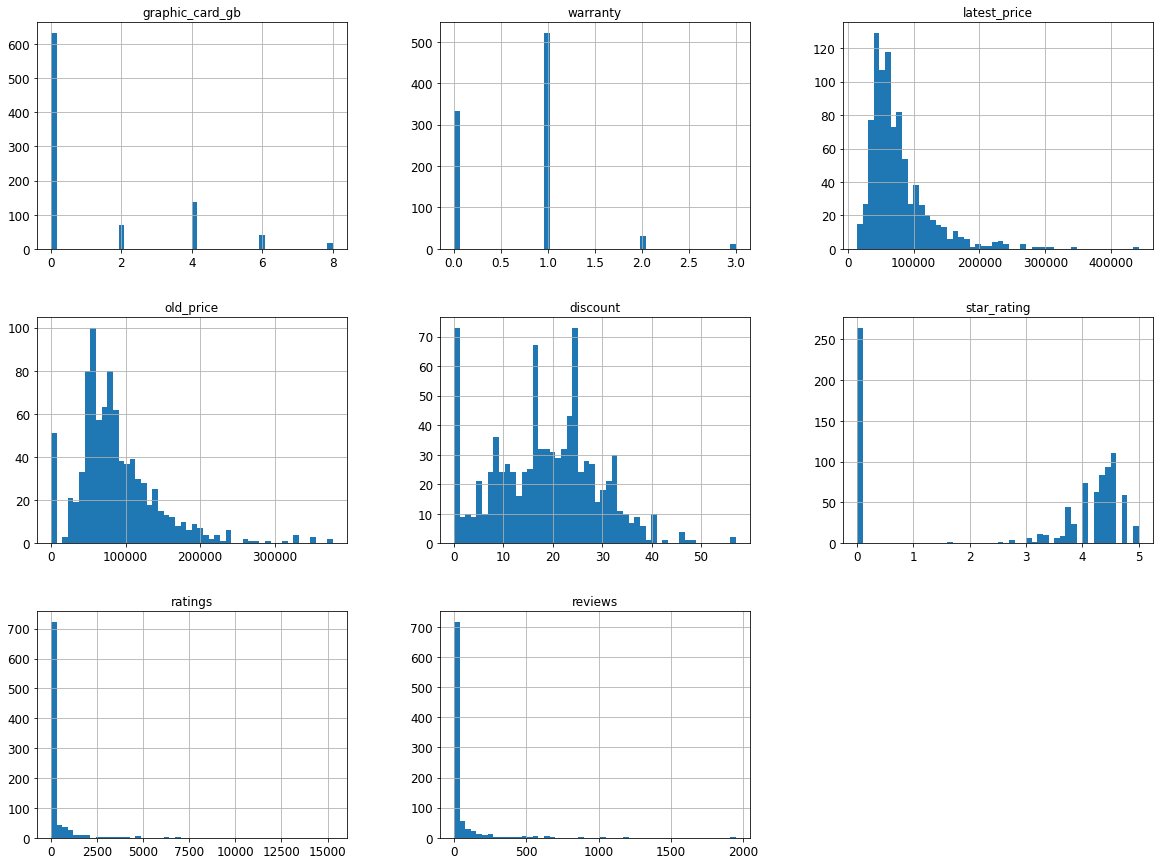

In [ ]:
#importando matplotlib
import matplotlib.pyplot as plt
tabela.hist(bins=50, figsize=(20,15))
plt.show()

Nessa etapa, de um forma geral, os dados da tabela foram visto, desde a visualizacao de partes da tabela, ate informacoes de como estao cada coluna, do tipo de dado presente nela e se existem ou nao valores nulos. Alem de terem sido plotados graficos de como estao os valores dos dados nas culunas

**BUSCANDO CORRELACAO**

O coeficiente de correlação varia de -1 a 1. Próximo de 1 é uma forte correlação positiva, próximo de -1 é uma forte correlação negativa e próximo de zero significa que não há correlação linear.

In [ ]:
corr_matrix = tabela.corr()

In [ ]:
corr_matrix["latest_price"].sort_values(ascending=False)

latest_price       1.000000
old_price          0.748372
graphic_card_gb    0.487809
warranty           0.039767
star_rating       -0.161925
ratings           -0.164366
reviews           -0.170354
discount          -0.212207
Name: latest_price, dtype: float64

Pode-se perceber uma forte correlacao positiva entre o latest_price e o old_price, dentre todos, esse e o que possui maior correlacao. Quanto maior o old_price maior a tendencia do latest_price ser. Em segundo lugar o graphic_card_gb. Agora os que possuem maior correlacao negativa sao, discount, reviews, ratings e star_rating.

Outra maneira de verificar a correlação entre atributos é utilizar a função scatter_matrix, do Pandas, que plota cada atributo numérico em relação a qualquer outro atributo numérico . Então, selecionamos apenas alguns atributos promissores que parecem mais correlacionados com o valor final do notebook.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cdee290d0>,
      dtype=object)

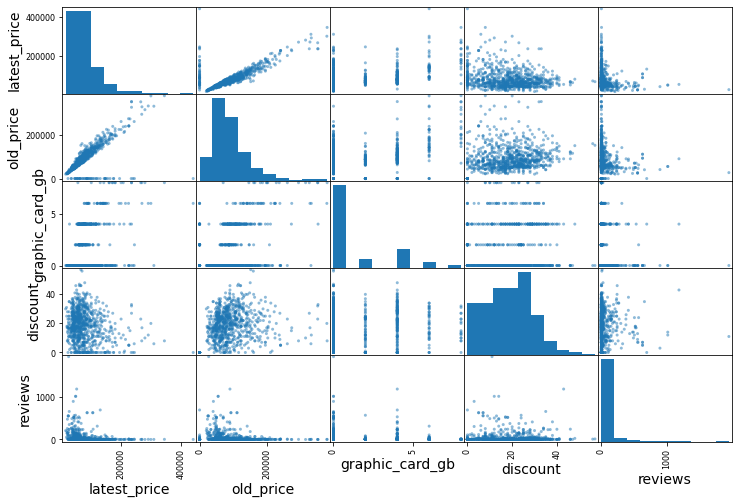

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["latest_price", "old_price", "graphic_card_gb",
              "discount","reviews"]
scatter_matrix(tabela[attributes], figsize=(12, 8))

O atributo mais promissor para prever o preco final é a renda preco antigo , então vamos observar o gráfico de dispersão de correlação. E possivel ver uma proporcao muito forte de com o almente de um o outro aumentar tambem.

Nessa etapa foi feita uma observacao e uma analise dos dados que temos de uma forma geral, foi feita plotagem de graficos e matriz de correlacao para observar atributos promissores para analise, alem de plotagens de graficos de forma individual para poder ver melhor como os dados de cada coluna estao se comportando nessa correlacao

**OLHANDO OS DADOS CATEGORICOS UM A UM PARA TER MAIS INFORMACOES E VER COMO ESTAO SEUS VALORES E SE TEM ALGO FALTANDO**

Brand nao possui nenhum valor faltando

In [ ]:
tabela['brand'].value_counts()

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
Vaio           5
LG             5
Nokia          4
ALIENWARE      4
realme         4
Infinix        4
lenovo         3
Smartron       3
MICROSOFT      3
RedmiBook      3
Mi             2
iball          1
SAMSUNG        1
Name: brand, dtype: int64

model possui 95 valores missing

In [ ]:
tabela['model'].value_counts()

Missing     95
VivoBook    89
Inspiron    77
Pavilion    38
IdeaPad     37
            ..
B50-70       1
GE76         1
GP65         1
GP76         1
Thinkpad     1
Name: model, Length: 117, dtype: int64

processor_brand nao possui nenhum valor faltando

In [ ]:
tabela['processor_brand'].value_counts()

Intel       660
AMD         208
M1           24
MediaTek      3
Qualcomm      1
Name: processor_brand, dtype: int64

processor_name nao possui nenhum valor faltando

In [ ]:
tabela['processor_name'].value_counts()

Core i5              312
Core i3              170
Core i7              112
Ryzen 5               85
Ryzen 7               58
Ryzen 9               26
Ryzen 3               26
Celeron Dual          24
M1                    24
Pentium Quad          14
Core i9                8
APU Dual               7
GeForce RTX            4
MediaTek Kompanio      3
Genuine Windows        3
Dual Core              3
GeForce GTX            2
Pentium Silver         2
Hexa Core              2
Ever Screenpad         2
Athlon Dual            2
Quad                   1
A6-9225 Processor      1
GEFORCE RTX            1
Core m3                1
Core                   1
Ryzen                  1
Snapdragon 7c          1
Name: processor_name, dtype: int64

processor_gnrtn possui 239 valores faltando

In [ ]:
tabela['processor_gnrtn'].value_counts()

11th       346
10th       246
Missing    239
8th         43
7th         12
9th          6
12th         3
4th          1
Name: processor_gnrtn, dtype: int64

ram_gb nao possui nenhum valor faltando

In [ ]:
tabela['ram_gb'].value_counts()

8 GB GB     454
4 GB GB     259
16 GB GB    180
32 GB GB      3
Name: ram_gb, dtype: int64

ram_type nao possui nenhum valor faltando

In [ ]:
tabela['ram_type'].value_counts()

DDR4       760
LPDDR4X     66
LPDDR4      36
LPDDR3      14
DDR3        12
DDR5         8
Name: ram_type, dtype: int64

ssd nao possui nenhum valor faltando

In [ ]:
tabela['ssd'].value_counts()

512 GB     417
256 GB     201
0 GB       151
1024 GB    111
128 GB      12
2048 GB      2
32 GB        1
3072 GB      1
Name: ssd, dtype: int64

hdd nao possui nenhum valor faltando

In [ ]:
tabela['hdd'].value_counts()

0 GB       666
1024 GB    164
512 GB      65
2048 GB      1
Name: hdd, dtype: int64

os nao possui nenhum valor faltando

In [ ]:
tabela['os'].value_counts()

Windows    832
DOS         36
Mac         28
Name: os, dtype: int64

os_bit nao possui nenhum valor faltando

In [ ]:
tabela['os_bit'].value_counts()

64-bit    761
32-bit    135
Name: os_bit, dtype: int64

weight nao possui nenhum valor faltando

In [ ]:
tabela['weight'].value_counts()

Casual        566
ThinNlight    291
Gaming         39
Name: weight, dtype: int64

display_size possui 332 valores faltando

In [ ]:
tabela['display_size'].value_counts()

Missing    332
15.6       218
16         135
14         131
13.3        40
17.3         9
14.96        7
14.1         6
13           4
15           3
14.2         3
16.2         3
12.2         2
14.9         1
16.1         1
13.4         1
Name: display_size, dtype: int64

Touchscreen nao possui nenhum valor faltando

In [ ]:
tabela['Touchscreen'].value_counts()

No     793
Yes    103
Name: Touchscreen, dtype: int64

msoffice nao possui nenhum valor faltando

In [ ]:
tabela['msoffice'].value_counts()

No     606
Yes    290
Name: msoffice, dtype: int64

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

Com isso foi analisado todos os valores de colunas categoricas do dataframe, e visto se existem valores faltando ou algum outro tipo de problema para ser tratado. Alem de ver se existem valores que podem ser transformados em numericos para o treinamento futuro


##PREPARANDO OS DADOS PARA O APRENDIZADO

Criando um backup

In [ ]:
tabela_inicial=tabela

**Limpando os Dados**

Substituindo os valores da tabela de processador por valores inteiros, e subistituindo os dados faltando por um intermediario entre os os processadores

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [ ]:
for nAlterar in range(0,896):
  if tabela.iloc[nAlterar]['processor_gnrtn']=='11th':
    tabela.iat[nAlterar,4]=11
  if tabela.iloc[nAlterar]['processor_gnrtn']=='10th':
    tabela.iat[nAlterar,4]=10
  if tabela.iloc[nAlterar]['processor_gnrtn']=='8th':
    tabela.iat[nAlterar,4]=8
  if tabela.iloc[nAlterar]['processor_gnrtn']=='7th':
    tabela.iat[nAlterar,4]=7
  if tabela.iloc[nAlterar]['processor_gnrtn']=='9th':
    tabela.iat[nAlterar,4]=9
  if tabela.iloc[nAlterar]['processor_gnrtn']=='12th':
    tabela.iat[nAlterar,4]=12
  if tabela.iloc[nAlterar]['processor_gnrtn']=='4th':
    tabela.iat[nAlterar,4]=4
  if tabela.iloc[nAlterar]['processor_gnrtn']=='Missing':
    tabela.iat[nAlterar,4]=9

In [ ]:
tabela['processor_gnrtn'].value_counts()

11    346
10    246
9     245
8      43
7      12
12      3
4       1
Name: processor_gnrtn, dtype: int64

Mudando o tipo de dado da tabela para inteiro depois de substituir os valores

In [ ]:
tabela['processor_gnrtn']= pd.to_numeric(tabela["processor_gnrtn"])

Mudar a memoria ram pra int

In [ ]:
for nAlterar in range(0,896):
  if tabela.iloc[nAlterar]['ram_gb']=='8 GB GB':
    tabela.iat[nAlterar,5]=8
  if tabela.iloc[nAlterar]['ram_gb']=='4 GB GB':
    tabela.iat[nAlterar,5]=4
  if tabela.iloc[nAlterar]['ram_gb']=='16 GB GB':
    tabela.iat[nAlterar,5]=16
  if tabela.iloc[nAlterar]['ram_gb']=='32 GB GB':
    tabela.iat[nAlterar,5]=32


In [ ]:
tabela['ram_gb'].value_counts()

8     454
4     259
16    180
32      3
Name: ram_gb, dtype: int64

convertendo para inteiro

In [ ]:
tabela['ram_gb']= pd.to_numeric(tabela["ram_gb"])

In [ ]:
for nAlterar in range(0,896):
  if tabela.iloc[nAlterar]['ssd']=='512 GB':
    tabela.iat[nAlterar,7]=512
  if tabela.iloc[nAlterar]['ssd']=='256 GB':
    tabela.iat[nAlterar,7]=256
  if tabela.iloc[nAlterar]['ssd']=='0 GB':
    tabela.iat[nAlterar,7]=0
  if tabela.iloc[nAlterar]['ssd']=='1024 GB':
    tabela.iat[nAlterar,7]=1024
  if tabela.iloc[nAlterar]['ssd']=='128 GB':
    tabela.iat[nAlterar,7]=128
  if tabela.iloc[nAlterar]['ssd']=='2048 GB':
    tabela.iat[nAlterar,7]=2048
  if tabela.iloc[nAlterar]['ssd']=='32 GB':
    tabela.iat[nAlterar,7]=32
  if tabela.iloc[nAlterar]['ssd']=='3072 GB':
    tabela.iat[nAlterar,7]=3072


In [ ]:
tabela['ssd'].value_counts()

512     417
256     201
0       151
1024    111
128      12
2048      2
32        1
3072      1
Name: ssd, dtype: int64

convertendo para inteiro

In [ ]:
tabela['ssd']= pd.to_numeric(tabela["ssd"])

In [ ]:
for nAlterar in range(0,896):
  if tabela.iloc[nAlterar]['hdd']=='0 GB':
    tabela.iat[nAlterar,8]=0
  if tabela.iloc[nAlterar]['hdd']=='1024 GB':
    tabela.iat[nAlterar,8]=1024
  if tabela.iloc[nAlterar]['hdd']=='512 GB':
    tabela.iat[nAlterar,8]=512
  if tabela.iloc[nAlterar]['hdd']=='2048 GB':
    tabela.iat[nAlterar,8]=2048

In [ ]:
tabela['hdd'].value_counts()

0       666
1024    164
512      65
2048      1
Name: hdd, dtype: int64

convertendo para inteiro

In [ ]:
tabela['hdd']= pd.to_numeric(tabela["hdd"])

Mudando os valores da coluna os_bit para inteiro

In [ ]:
tabela=tabela.replace(['64-bit'], 64)

In [ ]:
tabela=tabela.replace(['32-bit'], 32)

In [ ]:
tabela['os_bit']= pd.to_numeric(tabela["os_bit"])

Mudando os valores yes e no para 1 e 0

In [ ]:
tabela=tabela.replace(['Yes'], 1)

In [ ]:
tabela=tabela.replace(['No'], 0)

Convertendo as colunas que tem esses valores para inteiro

In [ ]:
tabela['Touchscreen']= pd.to_numeric(tabela["Touchscreen"])

In [ ]:
tabela['msoffice']= pd.to_numeric(tabela["msoffice"])

A coluna brand nao vai ser muito util para o treinamento por isso vai ser eliminada

In [ ]:
tabela=tabela.drop('brand',axis=1)

A coluna model tem apenas o nome do aparelho e nao vai ser muito util para o treinamento, alem de possuir 95 valores faltando, por isso vai ser eliminada

In [ ]:
tabela=tabela.drop('model',axis=1)

A coluna display size tem apenas o tamanho da tela aparelho com uma variacao bem pequena e nao vai ser muito util para o treinamento, alem de possuir 332 valores faltando, por isso vai ser eliminada

In [ ]:
tabela=tabela.drop('display_size',axis=1)

A coluna os nao vai agregar muito ao treinamento por isso vai ser eliminada

In [ ]:
tabela=tabela.drop('os',axis=1)

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   processor_brand  896 non-null    object 
 1   processor_name   896 non-null    object 
 2   processor_gnrtn  896 non-null    int64  
 3   ram_gb           896 non-null    int64  
 4   ram_type         896 non-null    object 
 5   ssd              896 non-null    int64  
 6   hdd              896 non-null    int64  
 7   os_bit           896 non-null    int64  
 8   graphic_card_gb  896 non-null    int64  
 9   weight           896 non-null    object 
 10  warranty         896 non-null    int64  
 11  Touchscreen      896 non-null    int64  
 12  msoffice         896 non-null    int64  
 13  latest_price     896 non-null    int64  
 14  old_price        896 non-null    int64  
 15  discount         896 non-null    int64  
 16  star_rating      896 non-null    float64
 17  ratings         

Tirando outros categoricos

In [ ]:
tabela=tabela.drop('processor_brand',axis=1)

In [ ]:
tabela=tabela.drop('processor_name',axis=1)

In [ ]:
tabela=tabela.drop('ram_type',axis=1)

In [ ]:
tabela=tabela.drop('weight',axis=1)

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   processor_gnrtn  896 non-null    int64  
 1   ram_gb           896 non-null    int64  
 2   ssd              896 non-null    int64  
 3   hdd              896 non-null    int64  
 4   os_bit           896 non-null    int64  
 5   graphic_card_gb  896 non-null    int64  
 6   warranty         896 non-null    int64  
 7   Touchscreen      896 non-null    int64  
 8   msoffice         896 non-null    int64  
 9   latest_price     896 non-null    int64  
 10  old_price        896 non-null    int64  
 11  discount         896 non-null    int64  
 12  star_rating      896 non-null    float64
 13  ratings          896 non-null    int64  
 14  reviews          896 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 105.1 KB


Resolvendo os valores de old_price que estao como 0

In [ ]:
old_zero=tabela[tabela['old_price']==0]

In [ ]:
old_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 7 to 893
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   processor_gnrtn  51 non-null     int64  
 1   ram_gb           51 non-null     int64  
 2   ssd              51 non-null     int64  
 3   hdd              51 non-null     int64  
 4   os_bit           51 non-null     int64  
 5   graphic_card_gb  51 non-null     int64  
 6   warranty         51 non-null     int64  
 7   Touchscreen      51 non-null     int64  
 8   msoffice         51 non-null     int64  
 9   latest_price     51 non-null     int64  
 10  old_price        51 non-null     int64  
 11  discount         51 non-null     int64  
 12  star_rating      51 non-null     float64
 13  ratings          51 non-null     int64  
 14  reviews          51 non-null     int64  
dtypes: float64(1), int64(14)
memory usage: 6.4 KB


foi identificado que old_price possui 51 valores que sao iguais a zero, e que vao atrapahar no treinamento, por isso devem ser tratados

Para tratar esses valores foi optado por colocar onde existem valores zero, a media de valores da coluna. Esse metodo foi escolhido pois nao existem muitos dados e por isso nao era interessante eliminar mais dados, entao a media vai ter um impacto menor no aprendizado do que deixar como zero

In [ ]:
tabela['old_price']=tabela['old_price'].replace(0,tabela['old_price'].mean())

In [ ]:
old_zero=tabela[tabela['old_price']==0]

In [ ]:
old_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   processor_gnrtn  0 non-null      int64  
 1   ram_gb           0 non-null      int64  
 2   ssd              0 non-null      int64  
 3   hdd              0 non-null      int64  
 4   os_bit           0 non-null      int64  
 5   graphic_card_gb  0 non-null      int64  
 6   warranty         0 non-null      int64  
 7   Touchscreen      0 non-null      int64  
 8   msoffice         0 non-null      int64  
 9   latest_price     0 non-null      int64  
 10  old_price        0 non-null      float64
 11  discount         0 non-null      int64  
 12  star_rating      0 non-null      float64
 13  ratings          0 non-null      int64  
 14  reviews          0 non-null      int64  
dtypes: float64(2), int64(13)
memory usage: 0.0 bytes


Nessa etapa foram tratados os problemas identificados nos dados, como dados ausentes, dados categoricos que foram transformados em numericos, e tambem colunas que nao seriam uteis para o treinamento e/ou tinham problemas nos dados eque por isso foram eliminadas

In [ ]:
tabela.to_csv('Dados_tratados_final_notebooks.csv', index=False)

##CRIANDO UM CONJUNTO DE TESTE

Usando Funções do Scikit-Learn para dividir o conjunto de dados com amostragem aleatória

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(tabela, test_size=0.2, random_state=42)
test_set.head()

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
711,9,4,512,0,64,0,0,0,0,34990,42999.0,18,0.0,0,0
440,11,16,512,0,64,4,1,0,1,100990,113000.0,10,0.0,0,0
525,10,16,512,0,64,0,1,0,0,57990,80990.0,28,4.3,76,9
722,9,4,0,1024,64,0,0,0,0,34990,36923.0,5,3.3,38,6
39,11,8,256,0,64,0,1,0,1,39990,50085.0,20,4.2,273,30


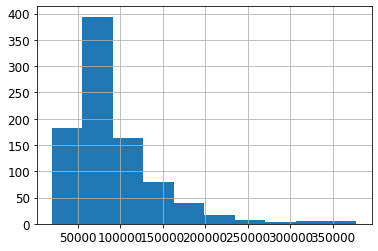

In [ ]:
tabela["old_price"].hist()

In [ ]:
tabela["preco_antigo"] = pd.cut(tabela["old_price"],
                                bins=[-1, 50000.5, 70000.0, 100000.5, 200000., np.inf],
                                labels=[1, 2, 3, 4, 5])
tabela["preco_antigo"].value_counts()

3    285
4    240
2    208
1    127
5     36
Name: preco_antigo, dtype: int64

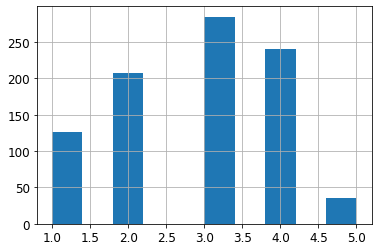

In [ ]:
tabela["preco_antigo"].hist()

O preco antigo foi considerado um atributo muito importante para a analise, e sera muito relevante para as previsoes, por isso vamos garantir que o conjunto de teste seja representativo, das varias categorias de preco

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(tabela, tabela["preco_antigo"]):
  strat_train_set = tabela.loc[train_index]
  strat_test_set = tabela.loc[test_index]

Agora vamos comprar as proporcoes da categoria de precos antigos no conjunto gerado com a amostragem estratificada e no conjunto completo de dados. O objetivo e garantir que o conjunto de teste esta com a mesma proporcao

In [ ]:
strat_test_set["preco_antigo"].value_counts() / len(strat_test_set)

3    0.316667
4    0.266667
2    0.233333
1    0.144444
5    0.038889
Name: preco_antigo, dtype: float64

In [ ]:
tabela["preco_antigo"].value_counts() / len(tabela)

3    0.318080
4    0.267857
2    0.232143
1    0.141741
5    0.040179
Name: preco_antigo, dtype: float64

In [ ]:
def preco_antigo_proportions(data):
  return data["preco_antigo"].value_counts() / len(data)
train_set, test_set = train_test_split(tabela, test_size=0.2, random_state=42)

# Criando a tabela de comparação de Viés de Amostragem

compare_props = pd.DataFrame({
  "Overall": preco_antigo_proportions(tabela),
  "Stratified": preco_antigo_proportions(strat_test_set),
  "Random": preco_antigo_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
# Comparação de viés de amostragem estratificada versus amostragem aleatória
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.141741,0.144444,0.133333,-5.931759,1.907262
2,0.232143,0.233333,0.188889,-18.632479,0.512821
3,0.318080,0.316667,0.355556,11.781676,-0.444444
4,0.267857,0.266667,0.283333,5.777778,-0.444444
5,0.040179,0.038889,0.038889,-3.209877,-3.209877


In [ ]:
# Removendo o atributo preco_antigo para que os dados voltem ao seu estado original, usado para criar o conjunto estratificado, dps elimina
for set_ in (strat_train_set, strat_test_set):
  set_.drop("preco_antigo", axis=1, inplace=True)

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   processor_gnrtn  896 non-null    int64   
 1   ram_gb           896 non-null    int64   
 2   ssd              896 non-null    int64   
 3   hdd              896 non-null    int64   
 4   os_bit           896 non-null    int64   
 5   graphic_card_gb  896 non-null    int64   
 6   warranty         896 non-null    int64   
 7   Touchscreen      896 non-null    int64   
 8   msoffice         896 non-null    int64   
 9   latest_price     896 non-null    int64   
 10  old_price        896 non-null    float64 
 11  discount         896 non-null    int64   
 12  star_rating      896 non-null    float64 
 13  ratings          896 non-null    int64   
 14  reviews          896 non-null    int64   
 15  preco_antigo     896 non-null    category
dtypes: category(1), float64(2), int64(13)
memory

In [ ]:
# Separando os atributos previsores e os rótulos, removendo os rótulos
tabela = strat_train_set.drop("latest_price", axis=1)
# Criando uma cópia dos rótulos
tabela_labels = strat_train_set["latest_price"].copy()

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 736 to 317
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   processor_gnrtn  716 non-null    int64  
 1   ram_gb           716 non-null    int64  
 2   ssd              716 non-null    int64  
 3   hdd              716 non-null    int64  
 4   os_bit           716 non-null    int64  
 5   graphic_card_gb  716 non-null    int64  
 6   warranty         716 non-null    int64  
 7   Touchscreen      716 non-null    int64  
 8   msoffice         716 non-null    int64  
 9   old_price        716 non-null    float64
 10  discount         716 non-null    int64  
 11  star_rating      716 non-null    float64
 12  ratings          716 non-null    int64  
 13  reviews          716 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 83.9 KB


Nessa etapa foi criado um conjunto de teste utilizando a estratificacao para ter a divisao dos dados

##Escalonamento de Características

Uma das transformações mais importantes que você precisa aplicar aos seus dados é o redimensionamento de características.
Com poucas exceções, os algoritmos de Machine Learning não funcionam bem quando os atributos numéricos de entrada têm escalas muito diferentes.


Padronização (escore-z)

A Cada valor do atributo a ser normalizado é adicionada ou subtraída uma medida de localização (valor médio) e o valor resultante é multiplicado ou dividido por uma medida de escala (desvio padrão).
A padronização subtrai o valor médio (portanto, os valores padronizados sempre têm média zero) e depois divide pelo desvio padrão para que a distribuição resultante tenha variância unitária.

Ao contrário do escalonamento min-max, a padronização não limita valores a um intervalo específico, o que pode ser um problema para alguns algoritmos (por exemplo, redes neurais geralmente esperam um valor de entrada variando de 0 a 1). No entanto, a padronização é muito menos afetada por outliers.

In [ ]:
from sklearn.impute import SimpleImputer #estimador
imputer = SimpleImputer(strategy="median")

In [ ]:
#importar pipeline
from sklearn.pipeline import Pipeline
#importar metodo de padronizacao
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# valores ausentes, combinando atributos, escalonamento
num_pipeline = Pipeline([
    #calcular a media substituir valores ausentes pela media
    ('imputer', SimpleImputer(strategy="median")),
     #escalonar atributos, padronizar dados numericos
    ('std_scaler', StandardScaler()),
  ])

#treinar e transformar todas as coisas de uma vez so
tabela_transform = num_pipeline.fit_transform(tabela)

In [ ]:
tabela_transform

array([[-0.92974937, -0.13219668,  0.26739561, ...,  0.7875365 ,
        -0.181641  , -0.2258623 ],
       [ 1.02531832, -0.13219668, -1.4429808 , ...,  0.43331116,
        -0.10083781, -0.13097914],
       [ 0.04778448, -0.13219668,  0.26739561, ...,  0.73693288,
         3.09310811,  2.42356762],
       ...,
       [-1.90728321, -0.13219668,  0.26739561, ..., -1.48962638,
        -0.32548844, -0.33534288],
       [ 0.04778448, -1.06016556, -1.4429808 , ...,  0.5345184 ,
         1.3172138 ,  1.24117741],
       [ 1.02531832, -0.13219668,  0.26739561, ...,  1.04055459,
        -0.3210487 , -0.33534288]])

##Construcao e treinamento de modelos

**Treinando e Avaliando o Conjunto de Treinamento com o modelo de Regressão Linear**

In [ ]:
# Treinando o modelo de Regressão Linear
#Pegar o modelno de regressao linear
from sklearn.linear_model import LinearRegression
#criar uma variavel que recebe esse metodo
lin_reg = LinearRegression()
#passar para a variavel os dados que ja preparei e os rotulos do meu atributo alvo
lin_reg.fit(tabela_transform, tabela_labels)

LinearRegression()

In [ ]:
# alguns dados vai em tabela e pega do inicial ate o 5, pegando essa 5 amostras da base de treinamento
some_data = tabela.iloc[:5]
#pegar os mesmos atributos alvos dos memos
some_labels = tabela_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

#imprima predictions chamando o metodo de predicao para esses dados
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [50281.42265246 46748.62778593 60340.45364664 87097.92282365
 99045.86634208]


exibindo e comparando com os valores reais:

In [ ]:
print("Labels:", list(some_labels))

Labels: [56990, 46990, 65990, 84990, 102990]


In [ ]:
some_data_prepared

array([[-0.92974937, -0.13219668,  0.26739561, -0.54904839,  0.41223129,
         1.37534044,  0.51531672, -0.36702427,  1.43066716, -0.18141688,
         1.29467968,  0.7875365 , -0.181641  , -0.2258623 ],
       [ 1.02531832, -0.13219668, -1.4429808 ,  2.00367011,  0.41223129,
        -0.58045649,  0.51531672, -0.36702427, -0.6989746 , -0.71202342,
        -0.16132658,  0.43331116, -0.10083781, -0.13097914],
       [ 0.04778448, -0.13219668,  0.26739561, -0.54904839,  0.41223129,
         1.37534044,  0.51531672, -0.36702427,  1.43066716, -0.06105319,
         0.71227718,  0.73693288,  3.09310811,  2.42356762],
       [-0.92974937,  1.72374106,  0.26739561, -0.54904839,  0.41223129,
         1.37534044,  0.51531672, -0.36702427,  1.43066716,  0.35564195,
         0.42107593, -0.07272503, -0.32193665, -0.32074547],
       [ 0.04778448, -0.13219668, -1.4429808 ,  0.72731086, -2.42582262,
        -0.58045649, -1.1392428 , -0.36702427, -0.6989746 ,  0.92356125,
         0.71227718,  0.83

In [ ]:
# Avaliando o modelo de Regressão Linear com a raiz do erro médio quadrático
from sklearn.metrics import mean_squared_error
#pegou o conjunto de dados preparados, fez a predicao e colocou aqui
tabela_predictions = lin_reg.predict(tabela_transform)
#tirando a raiz do erro metrico quadratico passando tabela labels e o resultado da predicao de todo o conjunto
#colocar em lin_mse
lin_mse = mean_squared_error(tabela_labels, tabela_predictions)
#tirou a raiz quadrada do lin_mse, raiz do erro medio quadratico
lin_rmse = np.sqrt(lin_mse)
#o resultado eh o erro que ele esta cometendo em reais
lin_rmse

13753.21703039605

O erro médio absoluto, MAE (da sigla em inglês Mean Absolute Error), é calculado a partir da média dos erros absolutos, ou seja, utilizamos o módulo de cada erro para evitar a subestimação, isso porque, o valor é menos afetado por pontos especialmente extremos (outliers).

In [ ]:
# avaliando o erro absoluto médio (MAE), outra metrica de avaliacao
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(tabela_labels, tabela_predictions)
lin_mae

6751.845001354269

**Avaliando Melhor com a Utilização da Validação Cruzada**

Uma maneira de avaliar o modelo de árvore de decisão seria usar a função train_test_split() para dividir o conjunto de treinamento em um conjunto de treinamento menor e um conjunto de validação.
Em, seguida, treinar seus modelos em relação ao conjunto de treinamento menor e avaliá-los em relação ao conjunto de validação. É um pouco trabalhoso, mas nada muito difícil, e funcionaria muito bem.
Uma ótima alternativa é usar o recurso de validação cruzada K-fold do Scikit-Learn.
O código a seguir divide aleatoriamente o conjunto de treinamento em 10 subconjuntos distintos chamados pastas, depois treina e avalia o modelo  10 vezes, escolhendo uma pasta diferente para avaliação a cada vez e treinando nas outras 9 pastas.

O resultado é um array contendo as 10 pontuações de avaliação:

In [ ]:
def display_scores(scores):
  #score
  print("Scores:", scores)
  #media ( de erro?)
  print("Mean:", scores.mean())
  #desvio padrao
  print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
# Treinando e Avaliando o modelo de Regressão Linear com Validação Cruzada
lin_scores = cross_val_score(lin_reg, tabela_transform, tabela_labels,
                              scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores) # A função de pontuação é o oposto do MSE (-scores),
#validacao da acerto e raiz do erro da punicao
display_scores(lin_rmse_scores)

Scores: [ 8961.17405919 14483.65791203 17666.46059366  7734.15628987
 18521.74676324 13498.05673078 18325.77718196 12008.65027993
 18937.54268475  7370.60930785]
Mean: 13750.783180325758
Standard deviation: 4352.131015663651


**Treinando e Avaliando o Conjunto de Treinamento com o modelo de Ávores de Decisão**

Vamos treinar um DecisionTreeRegressor. Este é um modelo poderoso, capaz de encontrar relacionamentos não lineares complexos nos dados

In [ ]:
# Treinando o modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor
#variavel, precisa incializar a arvore com uma semente, e um paramentro da prorpia arvore
tree_reg = DecisionTreeRegressor(random_state=42)
#treina com os dados que preparamos e seus respectivos labels
tree_reg.fit(tabela_transform, tabela_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
# alguns dados vai em tabela e pega do inicial ate o 5, pegando essa 5 amostras da base de treinamento
some_data2= tabela.iloc[:5]

#pegar os mesmos atributos alvos dos memos
some_labels2 = tabela_labels.iloc[:5]
some_data_prepared2 = num_pipeline.transform(some_data2)

#imprima predictions
print("Predictions:", tree_reg.predict(some_data_prepared2))

Predictions: [ 56990.  46990.  65990.  84990. 102990.]


exibindo e comprando com os valores reais

In [ ]:
print("Labels:", list(some_labels2))

Labels: [56990, 46990, 65990, 84990, 102990]


Os resultados deram exatamente os valores dos labels de primeira, necessita analise

In [ ]:
# avaliando o modelo de Árvore de Decisão com a raiz do erro médio quadrático
#passandos os basos preparados para o metodo de predicao de arvorse que estao treinadas
tabela_predictions = tree_reg.predict(tabela_transform)
#erro medio quadratico passado as etiquetas e os dados preditos
tree_mse = mean_squared_error(tabela_labels, tabela_predictions)
#tirado a raiz quadrada do mse
tree_rmse = np.sqrt(tree_mse)
tree_rmse

536.3855863152029

In [ ]:
# avaliando o erro absoluto médio (MAE), outra metrica de avaliacao
from sklearn.metrics import mean_absolute_error
tree_mae = mean_absolute_error(tabela_labels, tabela_predictions)
tree_mae

30.726256983240223

Observacao: o erro esta muito baixo, e necessario avaliar melhor esse modelo

**Avaliando Melhor com a Utilização da Validação Cruzada**

In [ ]:
# Treinando e Avaliando o modelo Árvore de Decisão com Validação Cruzada
                                    # v implementa a validacao cruzada
from sklearn.model_selection import cross_val_score
#chama o metodo passando a base tree reg que recebe o metodo regressor, os dados preparados, a etiqueta,
#o scoring vai ser a raiz do erro medio quadratico e dividir em 10 pastas
scores = cross_val_score(tree_reg, tabela_transform, tabela_labels,
                          scoring="neg_mean_squared_error", cv=10)
#tirar a raiz quadrada, tem q botar negativo, um usa a pontuacao e o outro o erro, e o oposto o - inverte a pontuacao
tree_rmse_scores = np.sqrt(-scores) # A função de pontuação é o oposto do MSE (-scores)

In [ ]:
display_scores(tree_rmse_scores)

Scores: [14174.87798595 13703.56236582 24785.61130166 20855.87990165
 19210.45569873  6956.06821815 12996.96382963 12929.00467232
 28128.13680285 11578.02357735]
Mean: 16531.858435412698
Standard deviation: 6194.651257225492


**Treinando e Avaliando o Conjunto de Treinamento com o modelo de Florestas Aleatórias**

As Florestas Aleatórias funcionam treinando muitas Árvores de Decisão em subconjuntos aleatórios dos recursos e, em seguida, calculando a média de suas previsões.
Construir um modelo em cima de muitos outros modelos é chamado de Ensemble Learning e geralmente é uma ótima maneira de impulsionar ainda mais os algoritmos de ML.

In [ ]:
# Treinando o modelo de Florestas Aleatórias
from sklearn.ensemble import RandomForestRegressor

#variavel que receber o metodo randomforestRegressor com 2 parametros que tem q colocar no inicion, sao 100 arvores e a semente
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

#treina passando os dados preparados e etiquetas do atributo alvo
forest_reg.fit(tabela_transform, tabela_labels)

RandomForestRegressor(random_state=42)

In [ ]:
# alguns dados vai em tabela e pega do inicial ate o 5, pegando essa 5 amostras da base de treinamento
some_data3= tabela.iloc[:5]

#pegar os mesmos atributos alvos dos memos
some_labels3 = tabela_labels.iloc[:5]
some_data_prepared3 = num_pipeline.transform(some_data)

#imprima predictions
print("Predictions:", forest_reg.predict(some_data_prepared3))

Predictions: [ 57335.59  47087.91  66555.88  84896.89 103075.  ]


Exibindo e comprando com os valores reais

In [ ]:
print("Labels:", list(some_labels3))

Labels: [56990, 46990, 65990, 84990, 102990]


Nota: especificamos n_estimators=100 para ser à prova de futuro, pois o valor padrão mudará para 100 no Scikit-Learn 0.22.

In [ ]:
# Avaliando o modelo de Florestas Aleatórias com a raiz do erro médio quadrático
# metodo de predicao passando os dados preparados
tabela_predictions = forest_reg.predict(tabela_transform)

#chama o erro medio quadratico passando etiqueta e os dados preditos
forest_mse = mean_squared_error(tabela_labels, tabela_predictions)

#calcular  etirar a raiz quadrada do resultado que veio
forest_rmse = np.sqrt(forest_mse)
forest_rmse

4655.2923908938155

In [ ]:
# avaliando o erro absoluto médio (MAE), outra metrica de avaliacao
from sklearn.metrics import mean_absolute_error
forest_mae = mean_absolute_error(tabela_labels, tabela_predictions)
forest_mae

1526.0570916467145

In [ ]:
# Avaliando o modelo de Florestas Aleatórias com Validação Cruzada
from sklearn.model_selection import cross_val_score

#crio variavel, passo a varivael que eu carreguei com o metodo, os dados preparados e os dados corretos
#digo que e pra fazer com erro medio quadrado e 10 pastas
forest_scores = cross_val_score(forest_reg, tabela_transform, tabela_labels,
                                scoring="neg_mean_squared_error", cv=10)
#dados do cross validation eh o oposto do erro medio, tiro a raiz quadrada e mostro resultado
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 3240.167287   10286.58827542 14879.06790203  8359.09164393
 18117.04362624  7819.00379655 10065.50386225 11031.57111375
 18250.95705613  8407.21359674]
Mean: 11045.620816005287
Standard deviation: 4512.969735343115


Nessa etapa houve a escolhe e o treinamento inicial de 3 modelos:<br>
- Regressao linear<br>
- Arvores de decisao<br>
- Florestas aleatorias<br><br>
Foram utilizadas algumas metricas para avaliar esses modelos, que por sua vez foram: A raiz do erro medio quadratico, dando a estimativa de mais ou menos em quanto do valor ele esta errando; e a validacao cruzada que divide o conjunto de treinamento em um conjunto de treinamento menor e um conjunto de validação (em 10 conjuntos), e entao fornce um array com as 10 pontuacoes que ele fez em cada conjunto;O erro médio absoluto, MAE (da sigla em inglês Mean Absolute Error), é calculado a partir da média dos erros absolutos, ou seja, utilizamos o módulo de cada erro para evitar a subestimação, isso porque, o valor é menos afetado por pontos especialmente extremos (outliers).



Os resultados obtidos foram:<br>
- Regressao linear:<br>
RMSE: 13753.21703039605<br>
Erro absoluto medio (MAE): 6751.845001354269<br>
Validacao cruzada:<br>
Scores: [ 8961.17405919 14483.65791203 17666.46059366  7734.15628987
 18521.74676324 13498.05673078 18325.77718196 12008.65027993
 18937.54268475  7370.60930785]<br>
Mean: 13750.783180325758<br>
Standard deviation: 4352.131015663651<br><br>

- Arvore de decisao:<br>
RMSE: 536.3855863152029<br>
Erro absoluto medio (MAE): 30.726256983240223<br>
Validacao cruzada:<br>
Scores: [14174.87798595 13703.56236582 24785.61130166 20855.87990165
 19210.45569873  6956.06821815 12996.96382963 12929.00467232
 28128.13680285 11578.02357735]<br>
Mean: 16531.858435412698<br>
Standard deviation: 6194.651257225492<br><br>

- Floresta Aleatoria:<br>
RMSE: 4655.2923908938155<br>
Erro absoluto medio (MAE): 1526.0570916467145<br>
Validacao Cruzada:<br>
Scores: [ 3240.167287   10286.58827542 14879.06790203  8359.09164393
 18117.04362624  7819.00379655 10065.50386225 11031.57111375
 18250.95705613  8407.21359674]<br>
Mean: 11045.620816005287<br>
Standard deviation: 4512.969735343115

Tendo em vista esses resultados, o modelo que aparentou ser mais promissor, foi a Floresta Aleatoria

**Avaliação do Modelo**

**Ajuste do Modelo**

Pesquisa de grade (Grid Search) - Abordagem para poucas combinações de Hiperparâmetros

Uma opção seria mexer nos hiperparâmetros manualmente, até encontrar uma ótima combinação de valores de hiperparâmetros. Isso seria um trabalho muito tedioso e você pode não ter tempo para explorar muitas combinações.

Em vez disso, você deve obter o GridSearchCV do Scikit-Learn para pesquisar por você

Dizer quais hiperparâmetros você deseja experimentar e quais valores experimentar, e ele usará validação cruzada para avaliar todas as combinações possíveis de valores de hiperparâmetros.
Por exemplo, o código a seguir procura a melhor combinação de valores de hiperparâmetros para RandomForestRegressor:

In [ ]:
# Pesquisando a melhor combinação de valores de hiperparâmetros
#Codigo para encontrar hiperparamentro

from sklearn.model_selection import GridSearchCV

#criando uma variavel chamando param_drid, tentar achar o melhor valor para 2 paramentros n_estimators e
#masx_features, paramestros do randomforestregressor
param_grid = [
    # tente 30 (5 × 6) combinações de hiperparâmetros
    #tentar q n_estimatores seja 3 dps 9 dps 50..., max_features assume valor 2, dps 4 dps 6 dps 9..., trocando valor
    {'n_estimators': [3, 9, 50, 80, 100], 'max_features': [2, 4, 6, 9, 10, 11]},
    # em seguida, tente 12 (3 × 4) combinações com bootstrap definido como False
    #bootstrap tem q mudar para falso pq por default eh verdadeiros
    {'bootstrap': [False], 'n_estimators': [3, 10,30], 'max_features': [2, 3, 4,6]},
  ]

#algoritimo que estamos testando v
forest_reg = RandomForestRegressor(random_state=42)

#                                                                  as 5x6 de cima e dps as 3x4
# treine com uma validacao cruzada em 10 pastas, que é um total de (30+12)*10=420 rodadas de treinamento
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(tabela_transform, tabela_labels)



GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 9, 10, 11],
                          'n_estimators': [3, 9, 50, 80, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

A pesquisa em grade explorará 30+12 = 42 combinações de valores de hiperparâmetros RandomForestRegressor e treinará cada modelo 10 vezes (já que estamos usando validação cruzada de cinco vezes). Em outras palavras, ao todo, serão 42x10 = 420 rodadas de treinamento! Pode levar muito tempo, mas quando estiver pronto, você poderá obter a melhor combinação de parâmetros como este:

In [ ]:
# A melhor combinação de hiperparâmetros encontrada
#variavel que vai ter o resultado da melhor combinacao
grid_search.best_params_

{'max_features': 9, 'n_estimators': 80}

Vejamos a pontuação de cada combinação de hiperparâmetros testada durante a pesquisa de grade:

In [ ]:
# Pontuação de cada combinação de hiperparâmetros testada com grid_search
#variavel recebe drid_search.. pega os resultados armazenados na variavel e coloca la
cvres = grid_search.cv_results_
#para media do score, parametros em zip,print raiz quadrada do valor medio(medida de qualidade)
# ao lado do parametro, imprime o valor que e o erro da estimativa, quanto menor eh melhor
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

21866.114028531847 {'max_features': 2, 'n_estimators': 3}
18737.047825520323 {'max_features': 2, 'n_estimators': 9}
16852.76737049427 {'max_features': 2, 'n_estimators': 50}
16809.458122971675 {'max_features': 2, 'n_estimators': 80}
16559.28355062533 {'max_features': 2, 'n_estimators': 100}
19705.315248637653 {'max_features': 4, 'n_estimators': 3}
16252.10438103467 {'max_features': 4, 'n_estimators': 9}
14453.090591465494 {'max_features': 4, 'n_estimators': 50}
14266.092392269838 {'max_features': 4, 'n_estimators': 80}
14268.742770524457 {'max_features': 4, 'n_estimators': 100}
17234.15230657334 {'max_features': 6, 'n_estimators': 3}
13913.969321126257 {'max_features': 6, 'n_estimators': 9}
13134.36336329577 {'max_features': 6, 'n_estimators': 50}
13151.201840405425 {'max_features': 6, 'n_estimators': 80}
13070.566844251332 {'max_features': 6, 'n_estimators': 100}
13798.17048909827 {'max_features': 9, 'n_estimators': 3}
12300.705104731149 {'max_features': 9, 'n_estimators': 9}
11901.33

Como 9 e 80 são os valores que tem a melhor pontuacao

In [ ]:
# melhores hiperparâmetros encontrados para o estimador
grid_search.best_estimator_

RandomForestRegressor(max_features=9, n_estimators=80, random_state=42)

**Pesquisa Aleatória (Randomized Search) - Abordagem para muitas combinações de Hiperparâmetros**

Quando o espaço de busca do Hiperparâmetro for grande é preferível utilizar o Randomizer Search em vez de Grid Search. Em vez de tentar todas as combinações possíveis, esta classe escolhe um valor aleatório para cada hiperparâmetro em cada interação e avalia um determinado número de combinações aleatórias.

In [ ]:
# Pesquisando a melhor combinação de valores de hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#cada vez que chamar a funcao ele vai gerar um valor randomico para o hiperparametro dentro da faixa escolhida
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                  n_iter=15, cv=10, scoring='neg_mean_squared_error', random_state=42)
                                  # ^ numero de vezes que vai ser combinado, quantidade de interacoes
rnd_search.fit(tabela_transform, tabela_labels)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=15,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7ce4f4fb90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7ce135ef10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Pontuação de cada combinação de hiperparâmetros testada com RandomizedSearch
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

12589.080090605672 {'max_features': 7, 'n_estimators': 180}
12370.950509157507 {'max_features': 8, 'n_estimators': 189}
13636.84707128063 {'max_features': 5, 'n_estimators': 103}
15478.988308031221 {'max_features': 3, 'n_estimators': 75}
12498.948365698234 {'max_features': 8, 'n_estimators': 117}
14314.871375352366 {'max_features': 4, 'n_estimators': 104}
12440.895038480021 {'max_features': 8, 'n_estimators': 131}
12989.502543182216 {'max_features': 6, 'n_estimators': 53}
16596.146931355153 {'max_features': 2, 'n_estimators': 88}
13072.99430113399 {'max_features': 6, 'n_estimators': 130}
13697.16549965626 {'max_features': 5, 'n_estimators': 161}
13051.873218029652 {'max_features': 6, 'n_estimators': 89}
18038.981617631303 {'max_features': 1, 'n_estimators': 59}
15584.470432896258 {'max_features': 3, 'n_estimators': 108}
12701.558944413006 {'max_features': 7, 'n_estimators': 64}


Melhor Resultado: 12370.950509157507 {'max_features': 8, 'n_estimators': 189}


**Comparação dos métodos (modelo RandomForestRegressor):**

Melhor Resultado (Grid_Search): 11801.88037746513 {'max_features': 9, 'n_estimators': 80}<br>
Melhor Resultado (RandomizedSearch)): 12370.950509157507 {'max_features': 8, 'n_estimators': 189}

##Avaliando o sistema com o conjunto de teste

Depois de ajustar seus modelos agora é a hora de avaliar o modelo final no conjunto de teste.

In [ ]:
#criando variavel do modelo final, recebendo os parametros do melhor valor do hiperparametros
final_model = grid_search.best_estimator_

# Separação dos atributos de entrada e de saída
#conjunto de teste a a amostragem estratificada sem a coluna latest_price
X_test = strat_test_set.drop("latest_price", axis=1) # dados sem rótulos
#y eh a base de dados de teste que foi estratificada com apenas a coluna alvo
y_test = strat_test_set["latest_price"].copy() # rótulos

#preparando os dados do conjunto de teste, so fez isso no de treinamento
X_test_prepared = num_pipeline.transform(X_test) # preparação dos dados
#fazer a predicao, do finalmodel.predict, passando os dados prparados dps do pipeline, colocar em final prediction
final_predictions = final_model.predict(X_test_prepared) # predição

# avaliação com RMSE
#passando rotulo e predicoes finais
final_mse = mean_squared_error(y_test, final_predictions)
#tirar a raiz quadrada
final_rmse = np.sqrt(final_mse)


In [ ]:
final_rmse

22908.15161109218

In [ ]:
final_predictions[:5]

array([ 48611.125     ,  39224.0375    ,  87368.9875    ,  68159.6125    ,
       134359.96666667])

In [ ]:
y_test[:5]

752     48990
708     36990
811     79990
499     71990
634    139990
Name: latest_price, dtype: int64

Nessa etapa o algoritimo realmente foi posto a prova, sendo testado com o conjunto real de testes, tendo assim seu rmse final, e tambem a comparacao de alguns valores preditos com os valores reais